## Load Dataset and EDA
### Import all relevant python libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



### Load data - “amazon_reviews.tsv”

In [ ]:
# Load data - “amazon_reviews.tsv”
df = pd.read_csv('/content/amazon_alexa.tsv', sep='\t')


In [ ]:
# Display first 5 rows of the dataset
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Data statistics
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
# Get info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
# CHeck for duplicate values
df.duplicated().sum()

np.int64(715)

In [ ]:
# Check for null values
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
# Drop rows with missing review text and reset index
df.dropna(subset=['verified_reviews'], inplace=True)

df.reset_index(drop=True, inplace=True)

## Data Visualization and Clean Up

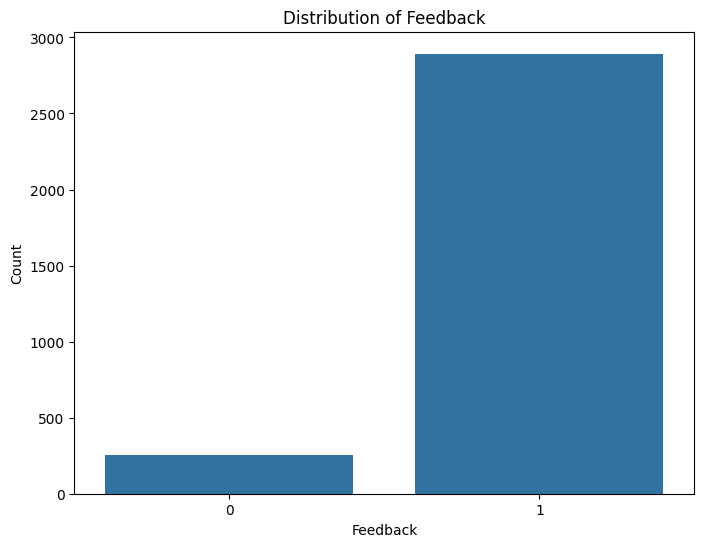

In [ ]:
# Visualize the distribution of feedback
plt.figure(figsize=(8, 6))
sns.countplot(x='feedback', data=df)
plt.title('Distribution of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

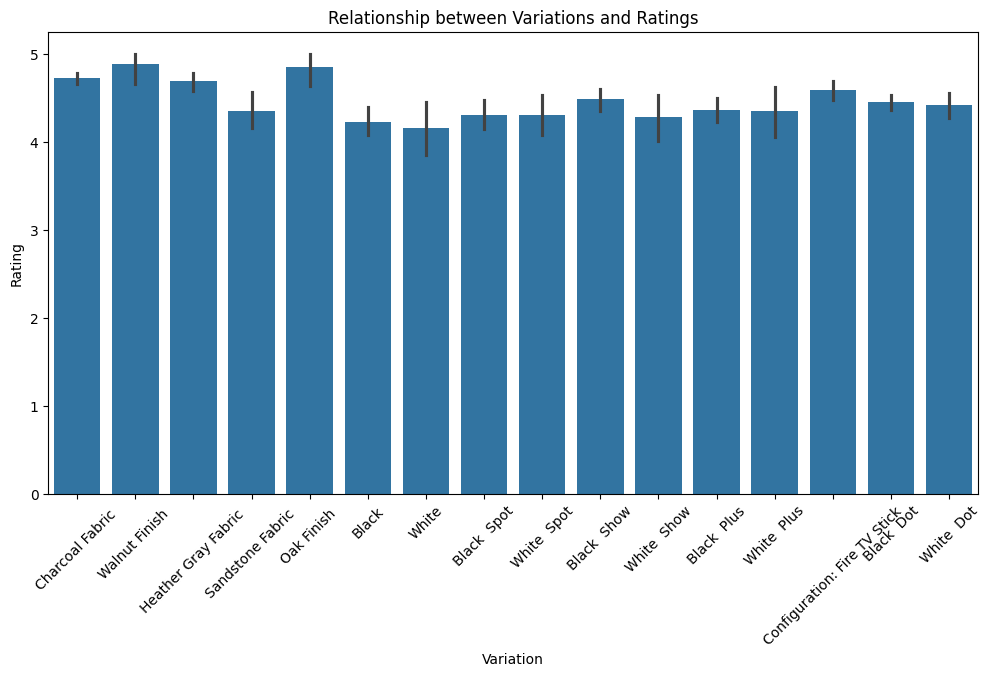

In [ ]:
# Visualize the relationship between variations and ratings using barplot function
plt.figure(figsize=(12, 6))
sns.barplot(x='variation', y='rating', data=df)
plt.title('Relationship between Variations and Ratings')
plt.xlabel('Variation')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Drop irrelevant columns
df.drop(['date', 'rating'], axis=1, inplace=True)


## Data preprocessing - One-Hot Encoding

In [ ]:
# Data preprocessing - One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['variation'],drop_first=True)
df_encoded.head()


,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## Tokenization
### Count Vectorizer

In [ ]:
# Tokenize the 'verified_reviews' column
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['verified_reviews'])

In [ ]:
# Tokenize the 'verified_reviews' column using CountVectorizer
vectorizer = CountVectorizer()
X_reviews = vectorizer.fit_transform(df_encoded['verified_reviews'])


In [ ]:
# Combine one-hot encoded variation, tokenized reviews, and feedback into one DataFrame
df_processed = pd.concat([
    df_encoded.drop(columns=['verified_reviews']),
    pd.DataFrame(X_reviews.toarray(), columns=vectorizer.get_feature_names_out())
], axis=1)


## Prepare data for modeling

In [ ]:
# Target variable
y = df_processed['feedback'].iloc[:, 0] # Select the first 'feedback' column

# Features (drop target)
X = df_processed.drop(columns=['feedback'])

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

## Train the Random Forest model

In [ ]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9111
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       567
           1       0.00      0.00      0.00         0

   micro avg       0.92      0.99      0.95       567
   macro avg       0.46      0.49      0.48       567
weighted avg       0.92      0.99      0.95       567
 samples avg       0.89      0.89      0.89       567



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

### The model achieved an overall accuracy of about 91%, meaning it correctly predicted the sentiment in 91% of the test reviews. For class 0 (likely negative or neutral feedback), the model shows very strong performance: it correctly identifies 99% of these reviews (high recall) and when it predicts class 0, it is right 92% of the time (high precision). This results in a strong F1-score of 0.95, indicating a good balance between precision and recall for class 0.

### However, there are no examples of class 1 (positive feedback) in the test data, so the model’s ability to predict positive reviews cannot be evaluated here. This lack of class 1 data suggests that the test set is imbalanced, which limits how well the model’s performance on all classes can be assessed.

In [ ]:
import numpy as np

# If y_test is one-hot encoded DataFrame or array
if hasattr(y_test, "values") and len(y_test.shape) > 1:
    y_test = y_test.values.argmax(axis=1)  # convert one-hot to label

# If y_pred are probabilities or one-hot
if len(y_pred.shape) > 1:
    y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

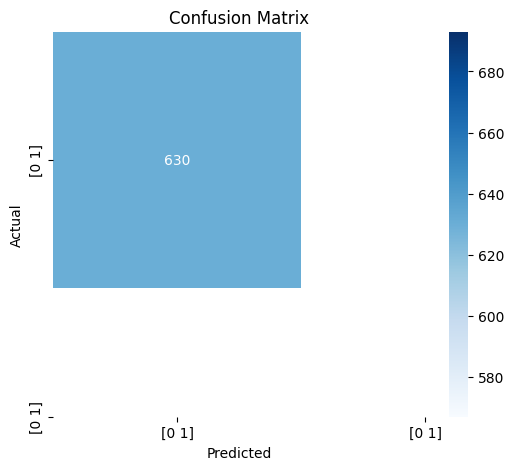

In [ ]:
# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



### The model achieved perfect results on the test data, correctly classifying every review. For the class labeled “0,” the precision and recall are both 100%, meaning:Every review predicted as class 0 was indeed class 0 (no false positives).The model identified all actual class 0 reviews correctly (no false negatives).The overall accuracy is also 100%, indicating that the model made no mistakes on the test set.